In [0]:
import sys, os, re, csv, codecs, numpy as np, pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers

Using TensorFlow backend.


In [0]:
# to import the files

from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My\ Drive/jigsaw-toxic-comment-classification-challenge

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive/My Drive/jigsaw-toxic-comment-classification-challenge


In [0]:
#read the data
training=pd.read_csv('./train.csv')
testing=pd.read_csv('./test.csv')

In [0]:
list_classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
y = training[list_classes].values
print(y)
list_sentences_train = training["comment_text"]
list_sentences_test = testing["comment_text"]

list_sentences_test[5]

[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 ...
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]


'Thank you for understanding. I think very highly of you and would not revert without discussion.'

In [0]:
list_sentences_train[5]
print(training.head())
data = training.values
X1_train = data[:,1]
Y_train = data[:,2]
print(Y_train)
print(X1_train)

                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0  
[0 0 0 ... 0 0 0]
["Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I

In [0]:
# Tokenization
#https://machinelearningmastery.com/prepare-text-data-deep-learning-keras/
#max_features = 20000
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X1_train)
encoded = tokenizer.texts_to_sequences(X1_train)

print(X1_train[8])
print(encoded[8:9])

Sorry if the word 'nonsense' was offensive to you. Anyway, I'm not intending to write anything in the article(wow they would jump on me for vandalism), I'm merely requesting that it be more encyclopedic so one can use it for school as a reference. I have been to the selective breeding page but it's almost a stub. It points to 'animal breeding' which is a short messy article that gives you no info. There must be someone around with expertise in eugenics? 93.161.107.169
[[263, 22, 1, 286, 34847, 24, 1476, 2, 6, 489, 73, 14, 9215, 2, 330, 215, 10, 1, 23, 1473, 51, 47, 2898, 15, 35, 12, 199, 73, 1051, 1060, 9, 11, 16, 57, 1390, 37, 48, 40, 81, 11, 12, 480, 17, 5, 273, 7, 18, 55, 2, 1, 4850, 8153, 27, 26, 78, 669, 5, 1368, 11, 687, 2, 96147, 96148, 53, 8, 5, 702, 7774, 23, 9, 1094, 6, 46, 468, 41, 251, 16, 159, 324, 21, 3566, 10, 13824, 3439, 4584, 3890, 4851]]


In [0]:
# Finding the maximum lenght for padding
max_len = 0;
for i in range(0, len(encoded)):
    if max_len < len(encoded[i]):
        max_len = len(encoded[i])

max_len = max_len + 1
print(max_len)
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

1404
210338


In [0]:
#in padding, by default pre padding
#we are going for post, why? ask Rishi
from sklearn.model_selection import train_test_split
padded_docs = pad_sequences(encoded, maxlen=max_len, padding='post')
print(padded_docs)
X_train, X_test, Y_train, Y_test = train_test_split( padded_docs, Y_train, test_size=0.2, random_state=42)

[[  688    75     1 ...     0     0     0]
 [96145    52  2635 ...     0     0     0]
 [  412   437    73 ...     0     0     0]
 ...
 [34278  7330  5208 ...     0     0     0]
 [    4    11   574 ...     0     0     0]
 [    4     7   134 ...     0     0     0]]


In [0]:
#defining the input layer
input_seq = Input(shape=(1404, ))
#here 1404 is maxlenght of padding , so the size of our input

In [0]:
#defining the embedding layer and passing the imput throught it
embed = Embedding(vocab_size, 100, input_length=max_len)(input_seq)

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
embed2 = LSTM(60, return_sequences=True,name='lstm_layer1')(embed)

In [0]:
x1 = GlobalMaxPool1D()(embed2)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
x1 = Dense(50, activation="relu")(x1)

In [0]:
#https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/
x1 = Dropout(0.1)(x1)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
x1 = Dense(1, activation="sigmoid")(x1)


In [0]:

classifier = Model(input_seq, x1)
classifier.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])
print(classifier.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1404)              0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 1404, 100)         21033800  
_________________________________________________________________
lstm_layer1 (LSTM)           (None, 1404, 60)          38640     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 60)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                3050      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total para

In [0]:
'''
classifier.layers.pop()
for layer in classifier.layers: layer.trainable = False
classifier.layers.pop()
for layer in classifier.layers: layer.trainable = False
print(classifier.summary())
'''

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1404)              0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 1404, 100)         21033800  
_________________________________________________________________
lstm_layer1 (LSTM)           (None, 1404, 60)          38640     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 60)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                3050      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
Total para

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [0]:
'''
#https://forums.fast.ai/t/how-to-finetune-with-new-keras-api/2328/10
#end up messing the layer initally bcoz of that so many stupid codes, can aviod this cell and above cell, with proper layers
last = classifier.layers[-1].output
x2 = Dense(1, activation="sigmoid")(last)'''

In [0]:
'''
classifier1 = Model(input_seq, x2)
classifier1.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])
print(classifier1.summary())'''

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1404)              0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 1404, 100)         21033800  
_________________________________________________________________
lstm_layer1 (LSTM)           (None, 1404, 60)          38640     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 60)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                3050      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
__________

In [0]:
print(X_train)
print(X_test)

[[14832  9031    56 ...     0     0     0]
 [  674    85   819 ...     0     0     0]
 [    1  5487     3 ...     0     0     0]
 ...
 [    7   578   172 ...     0     0     0]
 [  628  1560     7 ...     0     0     0]
 [    6    19   240 ...     0     0     0]]
[[13327    19     6 ...     0     0     0]
 [34915  1411    94 ...     0     0     0]
 [ 4070    46  4504 ...     0     0     0]
 ...
 [  345 63107   277 ...     0     0     0]
 [    5  1684   576 ...     0     0     0]
 [28891    89    20 ...     0     0     0]]


In [0]:
#verbose: Integer. 0, 1, or 2. Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.
#Not used , validation_split: Float between 0 and 1. Fraction of the training data to be used as validation data. The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch. The validation data is selected from the last samples in the x and y data provided, before shuffling.
classifier.fit(X_train, Y_train, batch_size=512, epochs = 10, 
    verbose=1, validation_data= (X_test, Y_test))

Train on 127656 samples, validate on 31915 samples
Epoch 1/10
127656/127656 [==============================] - 546s 4ms/step - loss: 0.1241 - acc: 0.9570 - val_loss: 0.1305 - val_acc: 0.9459
Epoch 2/10
127656/127656 [==============================] - 545s 4ms/step - loss: 0.1044 - acc: 0.9632 - val_loss: 0.1106 - val_acc: 0.9612
Epoch 3/10
127656/127656 [==============================] - 543s 4ms/step - loss: 0.0946 - acc: 0.9662 - val_loss: 0.1074 - val_acc: 0.9610
Epoch 4/10
127656/127656 [==============================] - 548s 4ms/step - loss: 0.0873 - acc: 0.9687 - val_loss: 0.1070 - val_acc: 0.9624
Epoch 5/10
127656/127656 [==============================] - 547s 4ms/step - loss: 0.0816 - acc: 0.9702 - val_loss: 0.1102 - val_acc: 0.9620
Epoch 6/10
127656/127656 [==============================] - 546s 4ms/step - loss: 0.0752 - acc: 0.9728 - val_loss: 0.1187 - val_acc: 0.9624
Epoch 7/10
127656/127656 [==============================] - 548s 4ms/step - loss: 0.0726 - acc: 0.9741 - val_

In [0]:
predictions = classifier.predict(X_test)
print(predictions)



[[3.0658379e-01]
 [4.9546361e-04]
 [2.4081826e-02]
 ...
 [7.6963863e-04]
 [9.6441257e-01]
 [5.3805085e-03]]


In [0]:
for i in range(len(predictions)):
    if predictions[i]>0.5:
        predictions[i] = 1
    else:
        predictions[i] = 0

print(predictions)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [1.]
 [0.]]


In [0]:
g=[]
for i in range(len(Y_test)):
  #print(Y_test[i])
  if(Y_test[i]==[1]):
    g.append(predictions[i])
print(g)

[]


In [0]:
from sklearn.metrics import confusion_matrix, classification_report

print(predictions)

Y_test = [[i] for i in Y_test]

print(Y_test)
print(classification_report(Y_test, predictions))

pd.DataFrame(
   confusion_matrix(Y_test, predictions),
   index = [['Actual', 'Actual'], ['Not Toxic', 'Toxic']],
   columns = [['Predicted', 'Predicted'], ['Not Toxic', 'Toxic']])

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [1.]
 [0.]]
[[0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [1], [1], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0

Predicted      
                 Not Toxic Toxic
Actual Not Toxic     28297   562
       Toxic           712  2344

roc_curve 0.8737708562791938


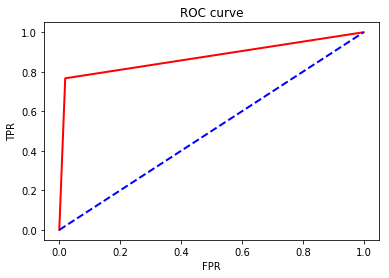

In [0]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr,_=roc_curve(Y_test,predictions)

print("roc_curve {}".format(roc_auc_score(Y_test,predictions)));

import matplotlib.pyplot as plt
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()